# 1 Linear Regression - Curve Fitting (Python)

## 1.1 Data generation
First, we need to generate the ground truth data. We begin by defining the following polynomial to be the "true" model: 

\begin{equation}
t = w_2x^2 + w_1x +w_0
\end{equation}


To generate the target values $t$, we sample $n$ equidistant values for $x$ in a range of $[-1,1]$ and use the above polynomial equation to generate $t$. To "simulate" the real-world scenario, where the observed data usually come with stochastic noise, we add random Gaussian noise to our target values. 

In [2]:
import random


# get ground-truth data from the "true" model 
n = 20  # number of data samples
# when generating our variables, we will make use of list comprehension in Python
x = [(idx-round(n/2))/(n/2) for idx in range(n)]
print(x)

w = [1, 2, 3]
t = [xn**2*w[2] + xn*w[1] + w[0] for xn in x]
print(t)

# "simulated" observed target values
std_noise = 0.2
t_observed = [t[idx]+random.gauss(0,std_noise) for idx in range(n)]

print(t_observed)

[-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
[2.0, 1.6300000000000001, 1.3200000000000003, 1.0699999999999998, 0.8800000000000001, 0.75, 0.68, 0.67, 0.72, 0.83, 1.0, 1.23, 1.52, 1.87, 2.2800000000000002, 2.75, 3.2800000000000002, 3.8699999999999997, 4.5200000000000005, 5.23]
[2.181371901438215, 1.6753633594265795, 1.5582208133091322, 1.169590577723886, 1.133728038444048, 0.6647892899472537, 0.7795825805552488, 0.7456544488543022, 0.8968726385373862, 1.119319557336747, 1.2113584646445559, 1.1717533992080584, 1.2968818146950332, 2.015478406351207, 2.382394957129486, 2.5912357196551574, 3.3004967138483843, 3.6983071677233776, 4.58773334039128, 5.0325773785642385]


Python plotting library [matplotlib](https://matplotlib.org/) is used to plot the observed target values `t_observed` with respect to each sampling location $x$ in blue points [`x`,`t_observed`]. We can also plot the noise-free "true" target values `t` versus the same `x`. This represents the underlying model as a curve.

Text(0.5,0,'$x$')

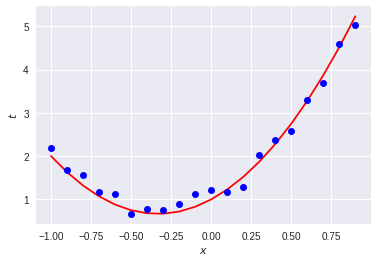

In [5]:
# this line is useful for jupyter notebook only
%matplotlib inline

import matplotlib.pyplot as plt

# plot the curve and the noise-corrupted data
plt.plot(x,t,'r')
plt.plot(x,t_observed,'bo')
plt.ylabel('$t$')
plt.xlabel('$x$')

## 1.2 Model Fitting
For numerical computations such as curve fitting, we can use Python's powerful [numpy](http://www.numpy.org/) library. In this tutorial, we use [*numpy.linalg.lstsq*](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.lstsq.html#numpy.linalg.lstsq) to solve [a system of linear equations](https://en.wikipedia.org/wiki/System_of_linear_equations) $\textbf{a}\textbf{x}=\textbf{b}$ for a [least sqaures solution](https://en.wikipedia.org/wiki/Least_squares).

Re-arrange the observed data to a linear system in matrix form "$\textbf{a}\textbf{x}=\textbf{b}$" (N.B. in this form $\textbf{x}$ is the unknown, not our learning input $x$):

\begin{equation}
\textbf{t} = \textbf{X}\textbf{w}
\end{equation}

that is:

\begin{equation}
\begin{vmatrix}
t_{(1)} \\ t_{(2)} \\ \cdots \\ t_{(n)}
\end{vmatrix} = \begin{vmatrix}
x^2_{(1)} & x_{(1)} & 1 \\
x^2_{(2)} & x_{(2)} & 1 \\
& \cdots \\
x^2_{(n)} & x_{(n)} & 1 
\end{vmatrix} \cdot
\begin{vmatrix}
w_2 \\ w_1 \\ w_0
\end{vmatrix}
\end{equation}



In [6]:
# use nunmpy for a least-square solution to the linear system "Xw=t"
import numpy as np

# first we need to turn t and x into numpy arrays as column vectors 
t_observed = np.reshape(t_observed, [-1, 1]) # -1 infers the length from the input vector
x_1 = np.reshape(x, [-1, 1])
x_2 = np.square(x_1)
x_0 = np.ones_like(x_1)
X = np.concatenate([x_2,x_1,x_0],1)
# print to check the inputs and their array shapes
print(X)
print(X.shape)
print(t_observed.shape)
w_estimate = np.linalg.lstsq(X, t_observed, rcond=None)
print(w_estimate[0])  # print the output

# calculate the estimated curve, i.e.
# t_estimate = [xn**2*w_estimate[2]+xn*w_estimate[1]+w_estimate[0] for xn in x]
# but matrix multiplication is more compact:
t_estimate = np.matmul(X,w_estimate[0])

[[ 1.   -1.    1.  ]
 [ 0.81 -0.9   1.  ]
 [ 0.64 -0.8   1.  ]
 [ 0.49 -0.7   1.  ]
 [ 0.36 -0.6   1.  ]
 [ 0.25 -0.5   1.  ]
 [ 0.16 -0.4   1.  ]
 [ 0.09 -0.3   1.  ]
 [ 0.04 -0.2   1.  ]
 [ 0.01 -0.1   1.  ]
 [ 0.    0.    1.  ]
 [ 0.01  0.1   1.  ]
 [ 0.04  0.2   1.  ]
 [ 0.09  0.3   1.  ]
 [ 0.16  0.4   1.  ]
 [ 0.25  0.5   1.  ]
 [ 0.36  0.6   1.  ]
 [ 0.49  0.7   1.  ]
 [ 0.64  0.8   1.  ]
 [ 0.81  0.9   1.  ]]
(20, 3)
(20, 1)
[[2.91019584]
 [1.84967667]
 [1.07820376]]


`w_estimate` are the best estimates of the weights $w$ - in a least squares sense. Finally, we can add a green curve (formed by points [`x`, `t_estimate`]) to the previous plot to visualise the estimated polynomial:

## 1.3 Model Fitting Error
From the above plot, we can see that the green curve (i.e. the fitted polynomial model) does not go through all of the observed points (in blue) which were used in fitting the model. This is known as redidual error (also known as training error). 

There is also discrepancy between the "true" curve (in red) and the estimated one (in green), but this difference is often impossible to obtain without access to the true underlying model.

In [0]:
# Calculate the sum of residuals and the root-mean-square error

# residuals:
Residuals = t_estimate-t_observed
SR = np.sum(np.square(Residuals))  # sums of residuals: b - a*x
# root-mean-square error
RMSE = np.sqrt(np.mean(np.square(Residuals)))
print(SR)
print(RMSE)

# plot the error distribution
plt.hist(Residuals)
plt.xlabel('Residuals')

## Questions
### Sample size
1. What is the effect on changing the sample size `n` on the model fitting and its errors?
2. How many samples are needed and why? 
3. What is the effect on the required sample size when the number of parameters in `w` is increased (i.e. increasing the order of the true polynomial)? 

### Model fitting
1. What is the objective (loss) function in this curve fitting problem?
2. How does change of the noise level (i.e. `std_noise`) affect the model fitting?
3. Are residualds a good estimate of the difference to the "true" target values and why?
4. How can we measure how "good" (or generalisable) the `t_estimated` values are?  